In [2]:
#Mount drive files
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
#install fast ai
!pip install torch_nightly -f https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html
!pip install fastai

Looking in links: https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html
    100% |████████████████████████████████| 576.2MB 25kB/s 


  Stored in directory: /root/.cache/pip/wheels/48/5d/04/22361a593e70d23b1f7746d932802efe1f0e523376a74f321e
Successfully built wrapt
spacy 2.0.18 has requirement numpy>=1.15.0, but you'll have numpy 1.14.6 which is incompatible.
  Found existing installation: wrapt 1.11.1
    Uninstalling wrapt-1.11.1:
      Successfully uninstalled wrapt-1.11.1


In [0]:
#import libraries
import fastai
from fastai import *
from fastai.text import * 
import pandas as pd
import numpy as np
from functools import partial
import io
import os

In [5]:
#get biopaper data 
trainCsvPath = Path('drive/My Drive/Year5/csc4006 Final Project/data/bioPaperExport_text_label.csv')
df = pd.read_csv(trainCsvPath)
df.head()

,text,label
0,Speaking is a sensorimotor behavior whose neur...,neuroscience
1,Resistance to proteasome inhibitors (PIs) is a...,cancer biology
2,Migration through constrictions can clearly ru...,cell biology
3,Peripheral nerve decoding algorithms form an i...,bioengineering
4,Mechanosensitive ion channels are membrane gat...,molecular biology


In [6]:
df.text[0]

"Speaking is a sensorimotor behavior whose neural basis difficult to study at the resolution of single neurons due to the scarcity of human intracortical measurements and the lack of animal models. We recorded from electrode arrays in the 'hand knob' area of motor cortex in people with tetraplegia. Neurons in this area, which have not previously been implicated in speech, modulated during speaking and during non-speaking movement of the tongue, lips, and jaw. This challenges whether the conventional model of a 'motor homunculus' division by major body regions extends to the single-neuron scale. Spoken words and syllables could be decoded from single trials, demonstrating the potential utility of intracortical recordings for brain-computer interfaces (BCIs) to restore speech. Two neural population dynamics features previously reported for arm movements were also present during speaking: a large initial condition-invariant signal, followed by rotatory dynamics. This suggests that common 

In [0]:
textPath = 'drive/My Drive/Year5/csc4006 Final Project/data/'
textCsv = 'bioPaperExport_text_label.csv'
data_lm = TextDataBunch.from_csv(textPath, textCsv,text_cols='text', label_cols='label')

In [0]:
data_lm.save()

In [9]:
data = TextDataBunch.load(textPath)
data.show_batch()

text,target
"xxbos xxmaj background : xxmaj the outcome of a given antibiotic treatment on the growth capacity of bacteria is largely dependent on the initial population size ( the xxmaj inoculum xxmaj effect , xxup ie ) . xxmaj for some specific classical antibiotic drugs this phenomenon is well established in both in - vitro and in - vivo studies , and its precise mechanisms , its clinical implications and its",microbiology
"xxbos xxmaj the phylogeny , biogeography and taxonomy of the xxunk xxunk of the xxmaj sicilian xxmaj channel , belonging to the genera xxmaj lampedusa and xxmaj muticaria , were investigated using morphological ( shell characters and anatomy of the reproductive system ) and genetic ( sequencing of a fragment of the mitochondrial large ribosomal subunit xxup 16s rrna , and the nuclear internal xxunk spacer 1 , xxup xxunk",zoology
"xxbos xxmaj background : xxmaj placental protein expression plays a crucial biological role during normal and complicated pregnancies . xxmaj we hypothesized that : ( 1 ) circulating pregnancy - associated , placenta - related protein levels throughout gestation reflect the uncomplicated , full - term temporal progression of human gestation , and effectively estimates gestational ages ( gas ) ; ( 2 ) pregnancies with underlying placental pathology ,",molecular biology
xxbos xxmaj background \n\n xxmaj human papillomaviruses are the most important causative agents for invasive cervical cancer development . xxup hpv type - specific vaccination and xxup hpv cervical cancer screening methods are being widely recommended to control the disease but the epidemiology of the circulating xxup hpv types may vary locally . xxmaj the circulating xxup hpv - strains have never been assessed in xxmaj burundi . xxmaj this,epidemiology
"xxbos xxmaj background : xxmaj plants demonstrate dynamic growth phenotypes that are determined by genetic and environmental factors . xxmaj phenotypic analysis of growth features over time is a key approach to understand how plants interact with environmental change as well as respond to different treatments . xxmaj although the importance of measuring dynamic growth traits is widely recognised , available open software tools are limited in terms of batch",plant biology


In [10]:
data.vocab.itos[:10]

['xxunk',
 'xxpad',
 'xxbos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 'the',
 ',']

In [11]:
data.train_ds[0][0]

Text xxbos xxmaj human genetic variants are usually represented by four values with variable length : chromosome , position , reference and alternate alleles . xxmaj there is no guarantee that these components are represented in a consistent way across different data sources , and processing variant - based data can be inefficient because four different comparison operations are needed for each variant , three of which are string comparisons . xxmaj working with strings , in contrast to numbers , poses extra challenges on computer memory allocation and data - representation . xxmaj existing variant identifiers do not typically represent every possible variant we may be interested in , nor they are directly reversible . xxmaj to overcome these limitations , variantkey , a novel reversible numerical encoding schema for human genetic variants , is presented here alongside a multi - language open - source software implementation ( https : / / github.com / xxmaj xxunk / variantkey ) . varia

In [0]:
bs=48

In [13]:
#split training and testing data (70:30)
from sklearn.model_selection import train_test_split
trainDf, testDf = train_test_split(df,stratify=df['label'], test_size = 0.33, random_state = 11)

trainDf.shape,testDf.shape

((19643, 2), (9676, 2))

In [0]:
#create models from data 
data_lm = TextLMDataBunch.from_df(train_df=trainDf,valid_df=testDf,path='',text_cols='text', label_cols='label')

In [15]:
data_lm.show_batch()

idx,text
0,"and unbiased molecular evidence that sexual maturation in xxup nmr is socially suppressed . xxmaj after transition into breeders , transcriptomes are markedly sex - specific , show pronounced feedback signaling via gonadal steroids and have similarities to reproductive phenotypes in xxmaj african cichlid fish . xxmaj further , nmrs show functional enrichment of status - related expression differences associated with aging . xxmaj lipid metabolism and oxidative phosphorylation -"
1,"xxmaj both fetuses had xxup zikv xxup rna in the fetal cerebral cortex as well as other tissues . xxmaj the 21 dpi fetal cerebral cortex exhibited notable defects in radial glia , radial glial fibers , loss and or damage of immature oligodendrocytes and a loss in xxunk cells ( npcs ) . xxmaj in addition , indices of pronounced neuroinflammation were observed including astrogliosis , increased microglia and"
2,"was used as control . xxmaj deionized water was poured into each set - up and the percentage of xxunk water overlying the sediment , water retained in the sediment particles , water that xxunk and passed through the hole of the centrifuge tube were monitored for 48 hours . xxmaj results showed that the addition of diatom frustules enhances the percolation of water in the sediment mixture especially those"
3,"capacity with examples from evolving xxup rna virus populations , which present on of the highest degrees of population heterogeneity found in nature . xxmaj using xxup disseqt , we empirically reconstruct the evolutionary trajectories of evolving populations in sequence space and genotype - phenotype fitness landscapes . xxmaj we show that while sequence space is vastly multidimensional , the relevant genetic space of evolving microbial populations is of intrinsically"
4,"idea that the preparatory state requires a separate trigger event before movement is initiated . xxmaj intersensory facilitation was not seen in predictive movements , perhaps because they filter out external signals that could interfere with internal timing events . xxbos xxmaj clownfishes ( or xxunk ) form an iconic group of coral reef fishes , particularly known for their mutualistic interaction with sea anemones . xxmaj they are characterized"


In [0]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

In [17]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 3.31E-02


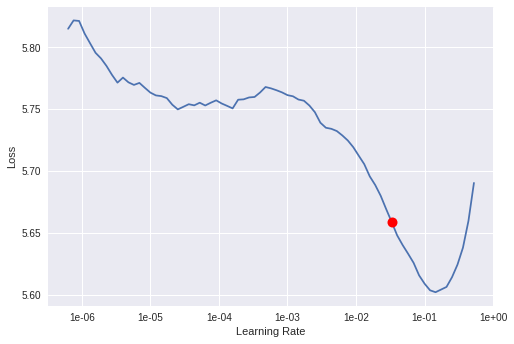

In [18]:
learn.recorder.plot(skip_end=15)

In [0]:
#no need to re run, load model weights from drive
#learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

In [0]:
#learn.save('bio02_fit_head')

In [0]:
from fastai.torch_core import *
#load from drive
modelPath = 'drive/My Drive/Year5/csc4006 Final Project/models/bioAbstract02/'
modelFitHead = 'bio02_fit_head.pth'
fit_head = modelPath+modelFitHead
state = torch.load(fit_head,map_location=None)



In [0]:
get_model(learn.model).load_state_dict(state['model'], strict=True)

In [0]:
learn.unfreeze()

In [24]:
#finetuning
learn.fit_one_cycle(1, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,4.068660,3.974172,0.326833


In [0]:
learn.save('bio02_fine_tuned_1_epoch')

In [0]:
learn.load('bio02_fine_tuned_1_epoch');

In [27]:
TEXT = "We show that these effects can"
N_WORDS = 40
N_SENTENCES = 2
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

We show that these effects can be found in many organisms . We demonstrate that the proportion of positive feedback is increased by in - depth modulation of the activity of the Drosophila Ras family ( e.g. , Apc ) , and
We show that these effects can be solved using the Fourier - Transform Entropy ( SIM ) algorithm , which between 1 and 7 identifies the most essential feature of the STEROIDOGENESIS chromatin . We create multiple HIS -


In [0]:
learn.save_encoder('bio02_fine_tuned_enc')

In [0]:
data_clas = TextClasDataBunch.from_df(path='',train_df=trainDf, valid_df=testDf, vocab=data_lm.train_ds.vocab,text_cols='text', label_cols='label')

In [30]:
data_clas.show_batch()

text,target
"xxbos xxmaj background : xxmaj the outcome of a given antibiotic treatment on the growth capacity of bacteria is largely dependent on the initial population size ( the xxmaj inoculum xxmaj effect , xxup ie ) . xxmaj for some specific classical antibiotic drugs this phenomenon is well established in both in - vitro and in - vivo studies , and its precise mechanisms , its clinical implications and its",microbiology
"xxbos xxmaj the concept of "" genetic bandwagoning "" is introduced . xxmaj in genetic bandwagoning , a bandwagoning allele evaluates the outlook for lineage fitness of the individual holding the allele . xxmaj if its holder 's lineage fitness figures to be low , the bandwagoning allele induces its holder to relinquish some , or all , of the holder 's own resources ( e.g. , food , territory",evolutionary biology
"xxbos xxmaj introduction : xxmaj the prostate exhibits a unique metabolism that changes during initial neoplasia to aggressive prostate cancer ( pca ) and metastasis . xxmaj the study of pca metabolism thus represents a new avenue for diagnostics , particularly early diagnosis of aggressive pca cases . xxmaj results : xxmaj here , using transcriptomics data from xxmaj the xxmaj cancer xxmaj genome xxmaj atlas ( 498 pca patients",bioinformatics
xxbos xxmaj the proposed xxmaj minimum xxmaj information xxmaj about xxmaj particle xxmaj tracking xxmaj experiments ( xxup miapte ) reporting guidelines described here aim to deliver a set of rules representing the minimal information required to report and support interpretation and assessment of data arising from intracellular multiple particle tracking ( xxup mpt ) experiments . xxmaj examples of such experiments are those tracking viral particles as they move,bioinformatics
"xxbos xxmaj background : xxmaj the xxmaj windover xxunk pond dates to the xxmaj early xxmaj archaic period ( xxunk - xxunk years ago ) and constitutes one of the earliest archaeological sites with intact and well - preserved human remains in xxmaj north xxmaj america . xxmaj unlike many prehistoric egalitarian hunter - gatherers , the xxmaj windover people may not have practiced a sex - based division of",evolutionary biology


In [0]:
learn = text_classifier_learner(data_clas,AWD_LSTM,drop_mult=0.5)
learn.load_encoder('bio02_fine_tuned_enc')
learn.freeze()

In [32]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 3.98E-02


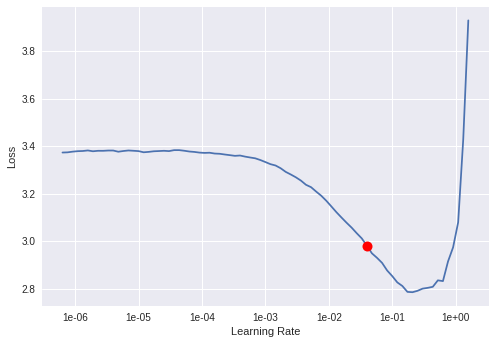

In [33]:
learn.recorder.plot()

In [34]:
learn.fit_one_cycle(1, 2e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,1.615506,1.297311,0.600765


In [0]:
learn.save('bio02_first')

In [36]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,1.498623,1.249846,0.613580


In [0]:
learn.save('bio02_second')

In [0]:
learn.load('bio02_second');

In [39]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,1.412495,1.215190,0.624742


In [40]:
learn.predict("Background: Hepatitis B Virus (HBV) and Hepatitis C Virus (HCV) are the leading causes of liver-related morbidity and mortality throughout the world. The magnitude of HBV and HCV infections in Ethiopia has not been well studied at community level. This study aimed at investigating the sero-prevalence and associated risk factors of HBV and HCV among HBV unvaccinated community members in South Omo Zone, Southern Ethiopia. Methods: A community-based cross-sectional study was conducted in three districts from March to May 2018. Structured questionnaire was used to collect relevant clinical and socio-demographic data. Three milliliter of blood sample was collected from each study participant and screened for HBV and HCV using one step hepatitis B surface antigen (HBsAg) test strip and one step HCV test strip, respectively. Samples found positive for HBsAg were further tested using immunoassay of Alere DetermineTM HBsAg (Alere Inc., USA). Data was analyzed using SPSS version 25.0. Results: A total of 625 (51.4% males, age 6-80 years, mean age ± SD = 30.83 ± 13.51 years) individuals participated in the study. The sero-prevalence for HBV infection was 8.0% as detected using one step HBsAg test strip, while it was 7.2% using Alere DetermineTM HBsAg test. The sero-prevalence for HCV infection was 1.9%. Two (0.3%) of the participants were seropositive for both HBV and HCV infections. High sero-prevalence for HBV infection was associated with weakness and fatigue (AOR = 5.20; 95% CI: 1.58, 17.15), while high sero-prevalence of HCV infection was associated with age group between 46 and 65 years (AOR = 13.02; 95% CI: 1.11, 152.41). Conclusion: this study revealed higher-intermediate endemicity level of HBV infection and low to intermediate endemicity level of HCV infection in the study area. Clinical symptoms like weakness and fatigue were found to be indictors for HBV infection, while individuals in the age group between 46 and 65 years were at higher risk for HCV infection. Provision of community- based health education, vaccination, mass screening and providing treatment would have utmost importance in reducing the transmission of these diseases in the present study area. Keywords: community, sero-prevalence, hepatitis, Southern Ethiopia")

(Category epidemiology,
 tensor(10),
 tensor([2.7314e-04, 1.0427e-03, 9.9660e-04, 1.2567e-02, 1.3241e-03, 1.4449e-03,
         1.1063e-03, 3.2341e-03, 1.1227e-04, 2.7389e-03, 8.6405e-01, 5.4481e-04,
         4.7551e-03, 1.6149e-02, 1.9079e-02, 5.4306e-02, 3.0963e-03, 3.9803e-03,
         6.1525e-06, 2.3720e-03, 1.4887e-03, 1.5030e-03, 4.5131e-04, 1.1214e-03,
         5.9823e-05, 1.7898e-03, 2.4091e-05, 3.8411e-04]))